# EDA
 
El proyecto contiene un análisis exploratorio de datos (EDA) de la información recuperada de los datos abiertos de ENACOM

### Fuente de datos
Se tienen como fuente de datos los siguientes archivos excel de ENACOM
[Datasets principales](https://indicadores.enacom.gob.ar/datos-abiertos)
- Internet.xlsx (obligatorio)
- Telefonia_movil.xlsx
- Television.xlsx
- telefonia_fija.xlsx
- Portabilidad.xlsx
- servicios_postales.xlsx
- mapa_conectividad.xlsx

Se importan las siguientes librerias

In [98]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
import pyproj as CRS
import warnings
#warnings.filterwarnings("ignore")

Se lee el primer archivo Internet.xlsx y la hoja Accesos Por Tecnología

In [99]:
df_at = pd.read_excel('Data/Internet.xlsx', sheet_name='Accesos Por Tecnología')

Se muestran los primeros registros

Los datos corresponden a los tipos de acceso a internet por año trimestres y provincia

In [100]:
df_at.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [27]:
# Se muestran las Estadísticas descriptivas
#df_at.describe()

Se procede a realizar la extraccion transformacion y carga de los Datos

Se muestra la informacion de las variables

In [101]:
df_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


Se muestran los valores nulos detectados

In [102]:
print(df_at.isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


Se muestran los registros con provincia nula

In [103]:
print(df_at[df_at['Provincia'].isnull()])

     Año                                          Trimestre Provincia  ADSL  \
984  NaN                                                NaN       NaN   NaN   
985    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
984         NaN           NaN       NaN    NaN    NaN  
985         NaN           NaN       NaN    NaN    NaN  


Se determina que hay dos registros con valores nulos e informacion resaltada en * se eliminan registros nulos

In [104]:
df_at.dropna(subset=['Provincia'], inplace=True)

Se muestran los valores duplicados

In [105]:
print(df_at[df_at.duplicated()])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []


Se muestran los Años unicos

In [107]:
print(df_at['Año'].unique())

[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014]


Se muestran los Trimestres unicos

In [108]:
print(df_at['Trimestre'].unique())

[1 4 3 2 '3 *' '2 *' '1 *']


Se eliminan los asteriscos de la columna Año asi como los espacios en blanco

In [109]:
df_at['Año'] = df_at['Año'].astype(str).str.replace(r'\*', '', regex=True).str.strip()

Se eliminan los asteriscos de la columna Trimestre asi como los espacios en blanco

In [111]:
df_at['Trimestre'] = df_at['Trimestre'].astype(str).str.replace(r'\*', '', regex=True).str.strip()

Se convierte el Año a numero entero

In [112]:
df_at['Año'] = pd.to_numeric(df_at['Año'], errors='coerce').fillna(0).astype(int)

Se convierte el Trimestre a numero entero

In [113]:
df_at['Trimestre'] = pd.to_numeric(df_at['Trimestre'], errors='coerce').fillna(0).astype(int)

Se convierten la columna ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total a numeros enteros

In [114]:
df_at[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']] = df_at[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].astype(int)

Convertir trimestre a mes 

In [115]:
def trimestre_a_mes(trimestre):
    return {
        1: '01',
        2: '04',
        3: '07',
        4: '10'
    }[trimestre]

Crear columna de fecha en formato YYYY-MM

In [116]:
df_at['Fecha'] = df_at.apply(lambda row: f"{row['Año']}-{trimestre_a_mes(row['Trimestre'])}-01", axis=1)

Convertir columna 'Fecha' a tipo datetime

In [117]:
df_at['Fecha'] = pd.to_datetime(df_at['Fecha'])

Agrupar por fecha para ver tendencias

In [118]:
df_time_series = df_at.groupby('Fecha').sum()


Serie de Tiempo para detectar tendencias

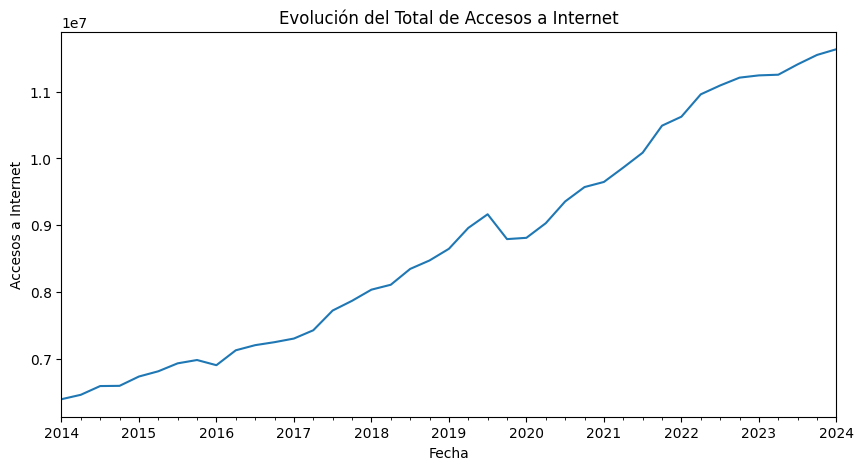

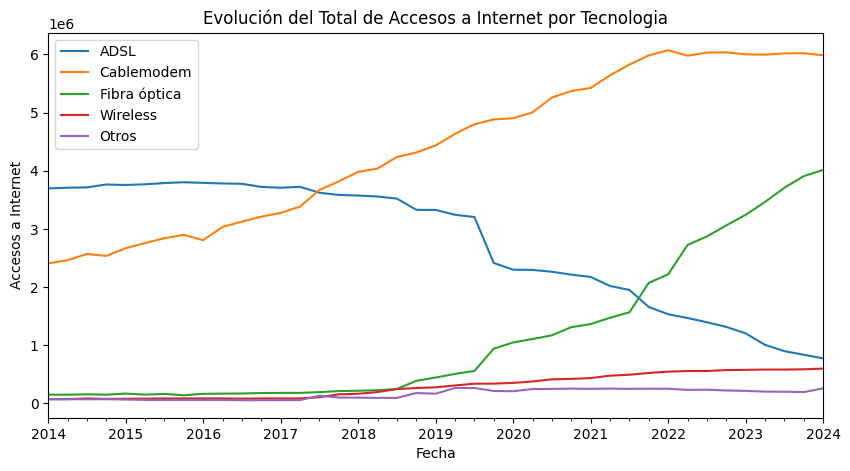

In [125]:
plt.figure(figsize=(10,5))
df_time_series['Total'].plot()
plt.title(f'Evolución del Total de Accesos a Internet')
plt.ylabel('Accesos a Internet')
plt.show()
plt.figure(figsize=(10,5))
for i, col in enumerate(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']):
    df_time_series[col].plot()
    plt.title(f'Evolución del Total de Accesos a Internet por Tecnologia')
plt.legend()
plt.ylabel('Accesos a Internet')
plt.show()

### Descripción General de los Gráficos
Los gráficos presentados muestran la evolución en el tiempo del número de accesos a internet en Argentina, divididas por tipo de tecnología (ADSL, cablemódem, fibra óptica, wireless, otros y el total). Cada línea representa la cantidad de accesos para un tipo de tecnología específico a lo largo de los años.

### Interpretación de las Tendencias
### Tendencias Generales:
Declive del ADSL: Se observa una clara tendencia a la baja en el número de accesos ADSL a lo largo de todo el período. Esto es esperable debido a la obsolescencia de esta tecnología y la mayor adopción de opciones más rápidas y estables.

Crecimiento sostenido del cablemódem y fibra óptica: Tanto el cablemódem como la fibra óptica muestran un crecimiento constante durante el período analizado. Esto indica una migración de los usuarios hacia tecnologías de mayor ancho de banda.

Expansión del wireless: Los accesos wireless también experimentaron un crecimiento significativo, especialmente en los últimos años. Esto se debe al aumento de la penetración de dispositivos móviles y la expansión de las redes inalámbricas.

Volatilidad en "Otros": La categoría "Otros" presenta una mayor variabilidad, lo que podría indicar la inclusión de tecnologías emergentes o menos comunes que experimentan fluctuaciones en su adopción.

Crecimiento sostenido del total: A pesar del declive del ADSL, el número total de accesos a internet muestra un crecimiento continuo, impulsado principalmente por el aumento de las conexiones de cablemódem, fibra óptica y wireless.

### Tendencias Específicas:
Aceleración en la adopción de fibra óptica: En los últimos años, se observa una aceleración en el crecimiento de los accesos de fibra óptica, lo que sugiere una mayor inversión en infraestructura y una demanda creciente por velocidades de conexión más altas.

Estabilización del cablemódem: El crecimiento del cablemódem parece haberse estabilizado en los últimos años, lo que podría indicar una saturación del mercado o una competencia más intensa con la fibra óptica.

Fluctuaciones en el wireless: Las conexiones wireless presentan cierta estacionalidad o fluctuaciones relacionadas con eventos específicos (por ejemplo, promociones, lanzamientos de nuevos dispositivos).

### Resumen:
En resumen, los gráficos muestran una clara evolución en el panorama de las conexiones a internet en Argentina, con un desplazamiento hacia tecnologías de mayor velocidad y capacidad. Sin embargo, es necesario realizar un análisis más profundo para comprender las causas de estas tendencias y sus implicaciones para el futuro.



Se guarda el archivo de Accesos por Tecnología

In [120]:
# Se archiva el dataframe como csv
#df_at.to_csv('Dataframe/df_at.csv',index=False,sep=';')
df_at.to_excel('Dataframe/df_at.xlsx',index=False, sheet_name='Accesos Por Tecnología')

Se lee el primer archivo Internet.xlsx y la hoja Penetracion-hogares

In [121]:
df_ph = pd.read_excel('Data/Internet.xlsx', sheet_name='Penetracion-hogares')

Se muestran los primeros registros

Los datos corresponden a los tipos accesos a internet por cada 100 hogares por año trimestres y provincia

In [122]:
df_ph.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


Se muestra la informacion de las variables

In [123]:
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Crearemos un gráfico de cajas para ver las distribuciones, variabilidad de los datos y diferencias entre los accessos cada 100 hogares en las distintas provincias.

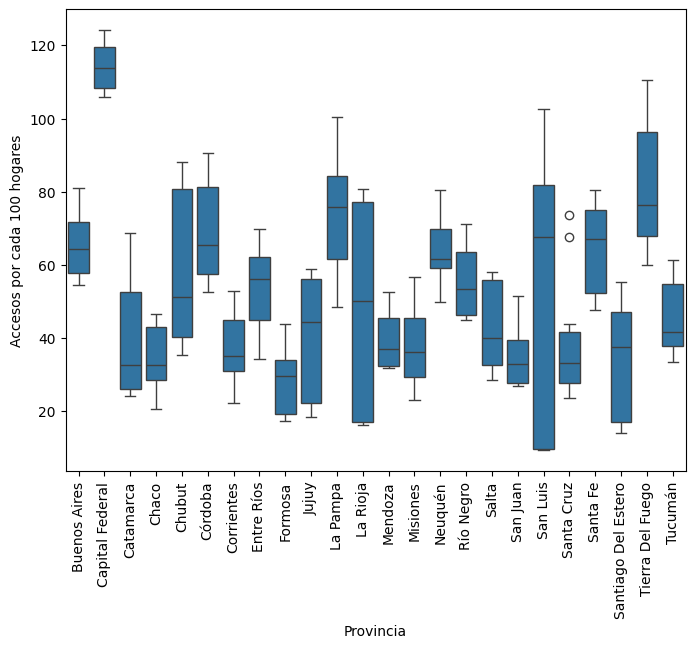

In [124]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data= df_ph )
plt.xticks(rotation=90)
plt.show()

### Análisis del Gráfico de Boxplot: Acceso a Internet por Provincia en Argentina

### Descripción del Gráfico
El gráfico de boxplot presentado ofrece una visual clara de la distribución de los accesos a internet por cada 100 hogares en las diferentes provincias de Argentina. Cada caja representa una provincia, y los elementos dentro de cada caja nos proporcionan información sobre la distribución de los datos.

### Interpretación de los Resultados
Desigualdad en el acceso: El gráfico muestra una clara desigualdad en el acceso a internet entre las diferentes provincias argentinas. Algunas provincias, como Buenos Aires y Capital Federal, presentan una mediana y un rango superior, lo que indica una mayor penetración de internet en los hogares. Por otro lado, provincias como Chaco y Formosa muestran una mediana y un rango inferior, lo que sugiere una menor disponibilidad de servicios de internet.

Variabilidad entre provincias: La altura de las cajas y la longitud de los bigotes varían considerablemente entre las provincias, lo que indica una alta variabilidad en la distribución de los accesos a internet. Esto sugiere que factores como la infraestructura, la densidad poblacional y el nivel socioeconómico influyen significativamente en la disponibilidad de servicios de internet a nivel provincial.

Presencia de valores atípicos (outliers): Algunos puntos aislados (valores atípicos) se observan en algunas provincias, lo que indica que existen hogares con un acceso a internet mucho mayor o menor que el promedio de su provincia. Estos valores atípicos podrían estar relacionados con factores específicos de esas localidades, como la presencia de centros urbanos o rurales, o la disponibilidad de servicios de alta velocidad.

### Resumen
En resumen, el gráfico de boxplot proporciona una visión general de la desigualdad en el acceso a internet en Argentina.

Se guarda el archivo de Penetracion-hogares

In [ ]:
df_at.to_excel('Dataframe/df_ph.xlsx',index=False, sheet_name='Penetracion-hogares')